In [27]:
import tensorflow as tf
print(tf.__version__)
import keras

1.14.0


In [28]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

len(X_train), len(X_test) # 60,000 images in x_train, 10,000 images in x_test

(50000, 10000)

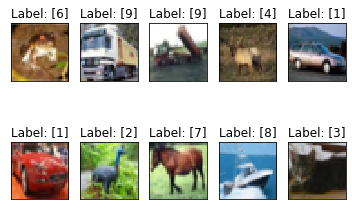

In [29]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout
    plt.imshow(X_train[i], cmap='gray', interpolation='none') # converts array to image
    plt.title("Label: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [30]:
# Already has a channel dimension so it does not require reshaping

input_shape = (32, 32, 3)

# Normalization (Scale input features between 0.0 and 1.0)
# 255 is the maximum value of a byte
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255
print('X_train shape:', X_train.shape) # X_train shape: (50000, 32, 32, 3)
print('X_train[0] shape:', X_train[0].shape) # X_train shape: (50000, 32, 32, 3)
print(y_train.shape)

X_train shape: (50000, 32, 32, 3)
X_train[0] shape: (32, 32, 3)
(50000, 1)


In [31]:
from keras.utils import to_categorical

# Set number of categories
num_category = 10

# One-Hot Encode Data
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)

print(X_train.shape[1:])
y_train.shape

(32, 32, 3)


(50000, 10)

In [32]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Softmax, Dropout, BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_category))
model.add(Activation('softmax'))

In [33]:
# Use popular and effective Adam Optimizer
# Categorical Cross Entropy as we have multiple classes
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.001,decay=1e-6),
              metrics=['accuracy'])

In [34]:
batch_size = 128
num_epoch = 20

# Train Model
model_log = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=num_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 319s 6ms/step - loss: 1.7999 - acc: 0.4533 - val_loss: 1.3130 - val_acc: 0.5810
Epoch 2/20
50000/50000 [==============================] - 318s 6ms/step - loss: 1.1451 - acc: 0.6306 - val_loss: 1.3145 - val_acc: 0.6427
Epoch 3/20
50000/50000 [==============================] - 320s 6ms/step - loss: 0.9350 - acc: 0.6953 - val_loss: 0.9555 - val_acc: 0.6918
Epoch 4/20
50000/50000 [==============================] - 1684s 34ms/step - loss: 0.8211 - acc: 0.7306 - val_loss: 0.8116 - val_acc: 0.7461
Epoch 5/20
50000/50000 [==============================] - 366s 7ms/step - loss: 0.7231 - acc: 0.7555 - val_loss: 1.2573 - val_acc: 0.6327
Epoch 6/20
50000/50000 [==============================] - 356s 7ms/step - loss: 0.6640 - acc: 0.7771 - val_loss: 0.7803 - val_acc: 0.7544
Epoch 7/20
50000/50000 [==============================] - 302s 6ms/step - loss: 0.6169 - acc: 0.7943 - val_loss: 0.6695 

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0]) # FINAL TEST LOSS: 0.6577928253173828
print('Test Accuracy:', score[1]) # FINAL TEST ACCURACY: 0.8152

Test Loss: 0.6577928253173828
Test Accuracy: 0.8152


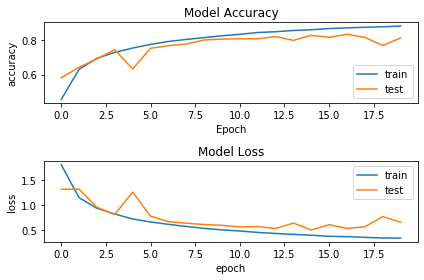

In [36]:
import os
# model accuracy plot
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

# model loss plot
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [37]:
# Save JSON config to disk
json_config = model.to_json()
with open("cifar.json", "w") as json_file:
    json_file.write(json_config)
    
# Save weights to disk
model.save_weights("cifar.h5")
print("Saved Model to Disk...")

Saved Model to Disk...
